## 0. Preperation

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%pwd
# should be MyDrive

'/content/drive/MyDrive'

In [ ]:
!git clone https://github.com/obss/sahi

fatal: destination path 'sahi' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Install latest version of SAHI and YOLOv5:

In [ ]:
!cp /content/drive/MyDrive/yolov8/runs/detect/yolov8_camo/weights/best.pt /content/drive/MyDrive/sahi/sahi/models

In [ ]:
!pip install -U torch sahi yolov5

      Successfully uninstalled opencv-python-4.8.0.76
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


- Import required modules:

In [ ]:
# arrange an instance segmentation model for test

# from sahi.utils.yolov5 import (
#     download_yolov5s6_model,
# )

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
yolov5_model_path = '/content/drive/MyDrive/sahi/sahi/models/best.pt'
#download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

In [ ]:
result = get_prediction("/content/drive/MyDrive/AA_SAHI_TEST/grass_2_vis.png", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

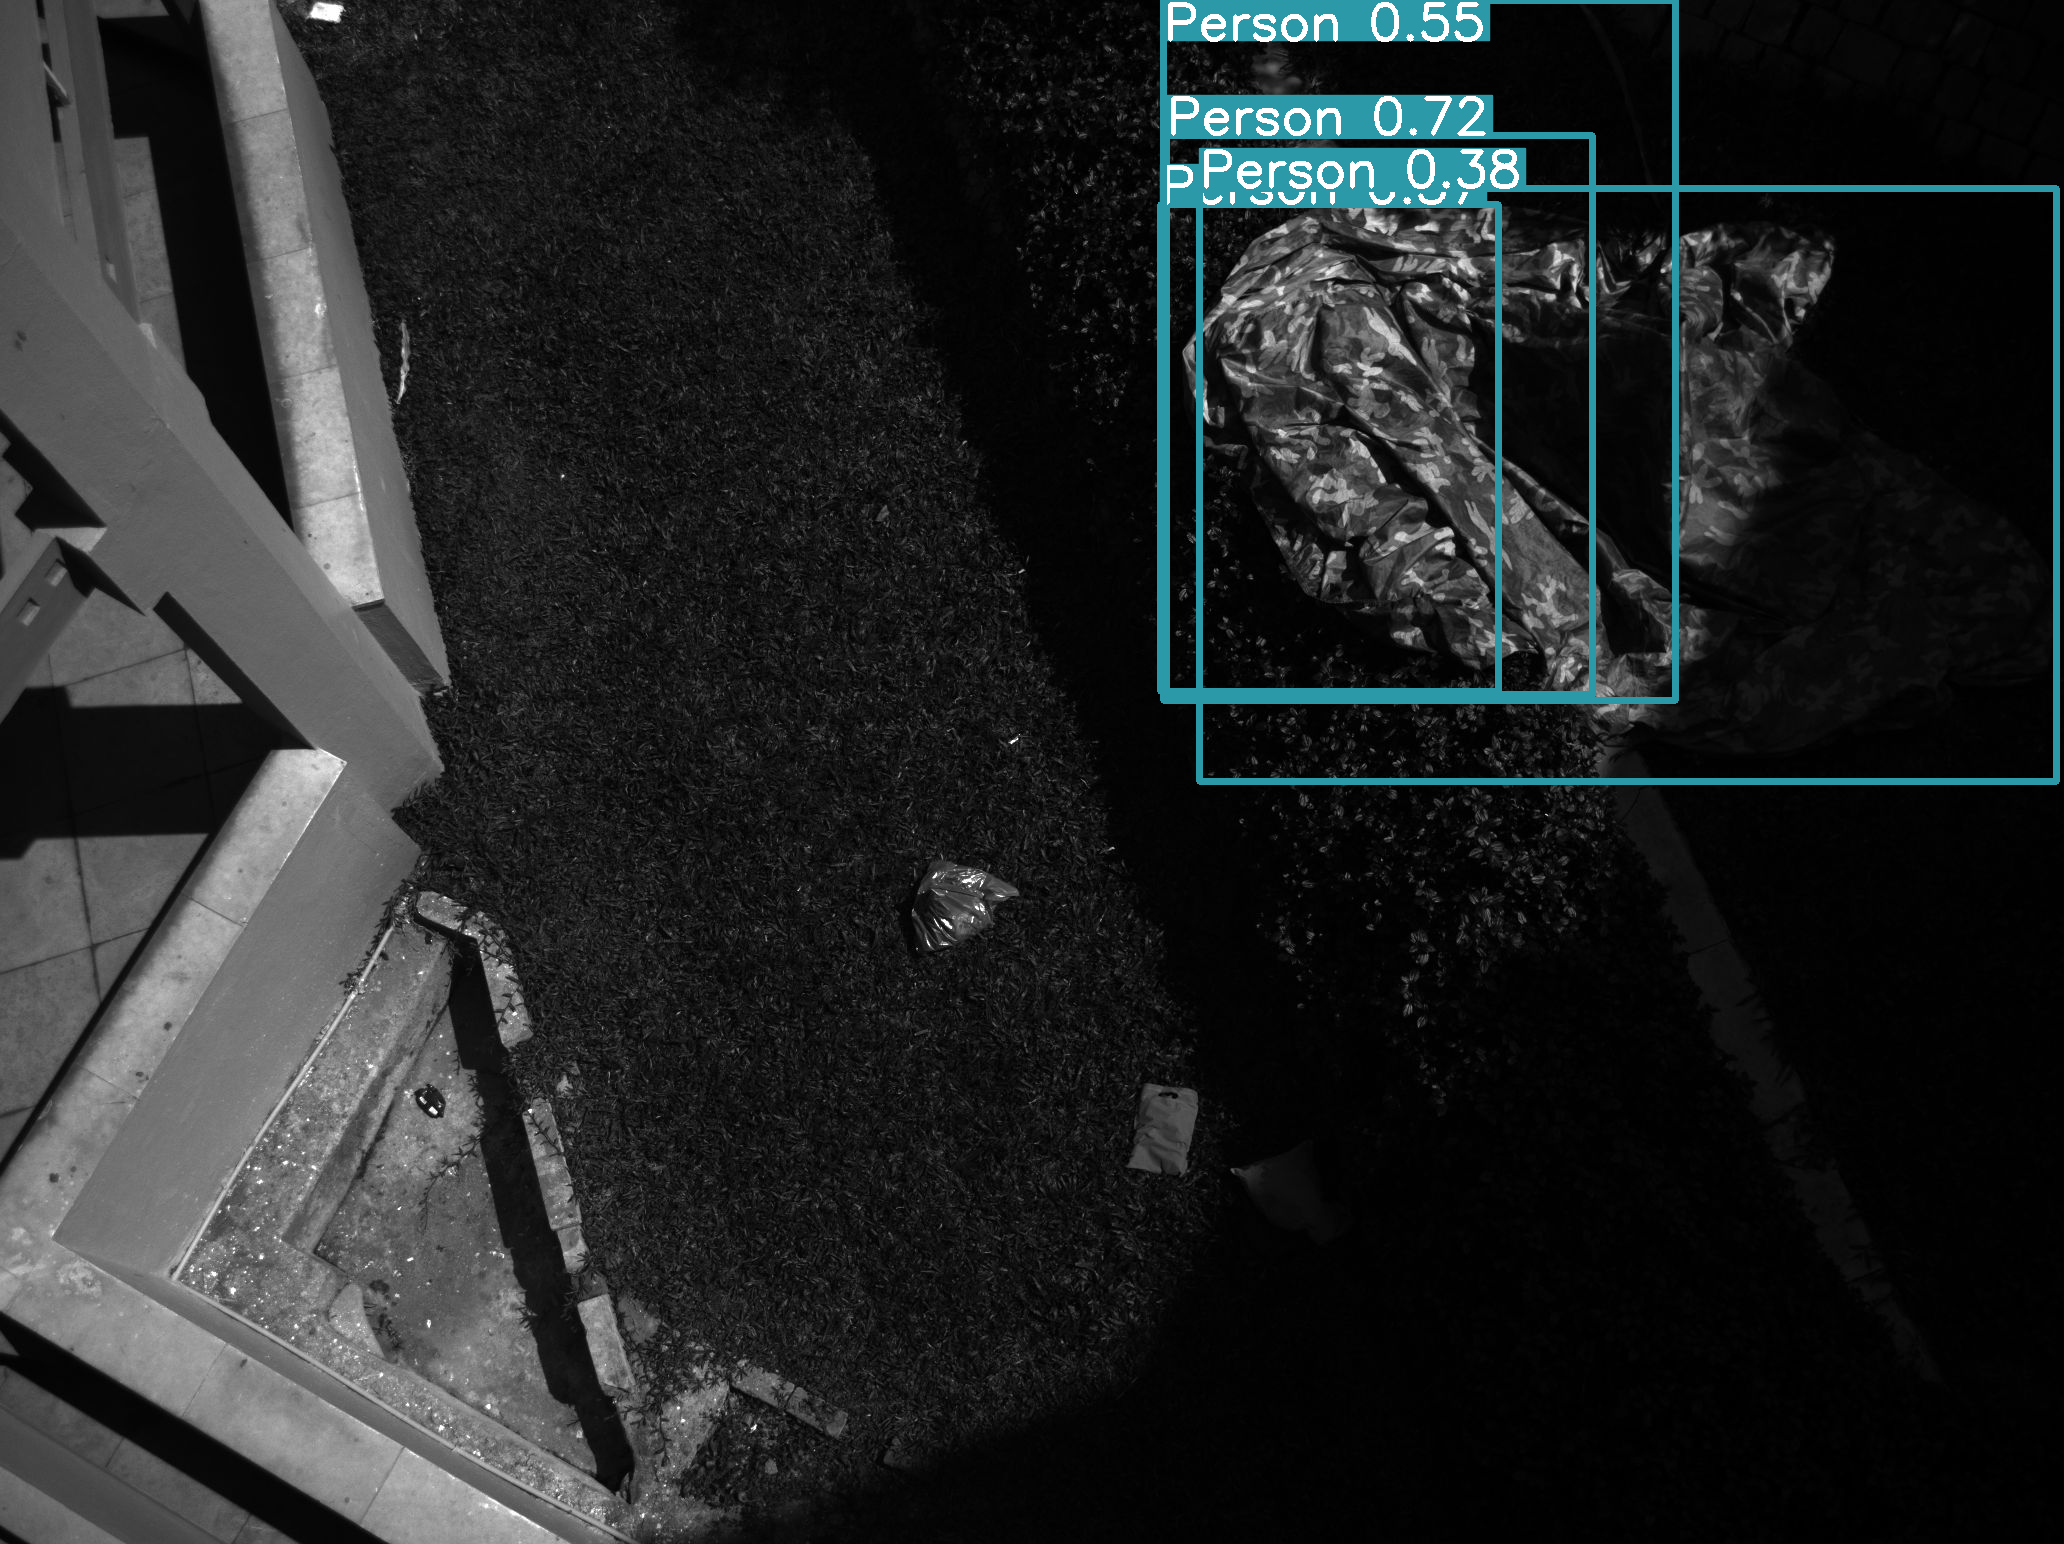

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

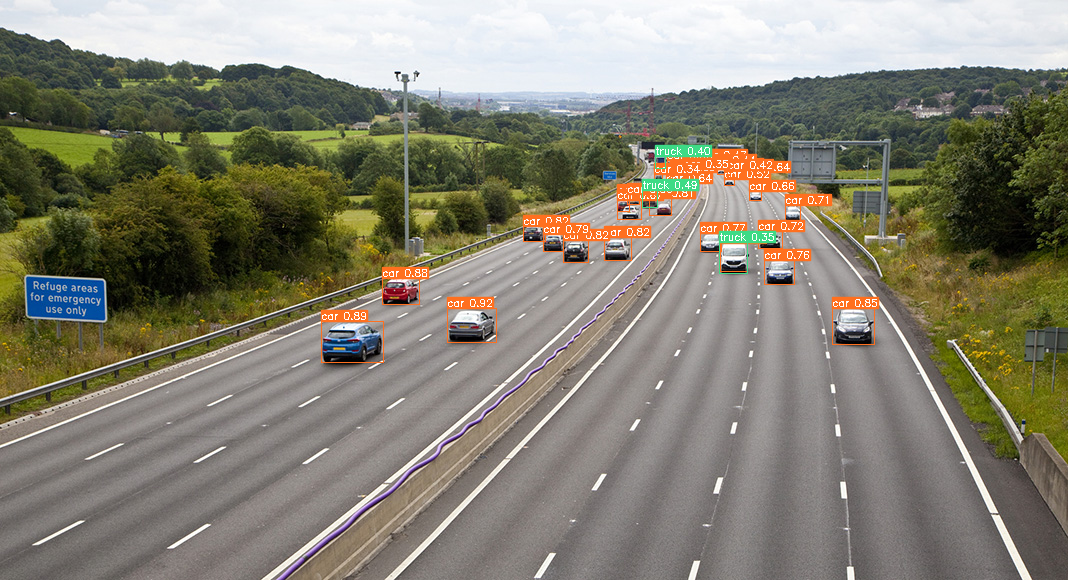

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447, 308, 496, 342), w: 49, h: 34>,
    mask: None,
    score: PredictionScore: <value: 0.9154329299926758>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447, 308, 49, 34],
  'score': 0.9154329299926758,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': None,
  'bbox': [321, 321, 62, 41],
  'score': 0.887977659702301,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': None,
  'bbox': [382, 278, 37, 26],
  'score': 0.8796820640563965,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447, 308, 49, 34],
  'score': 0.9154329299926758,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': 1,
  'bbox': [321, 321, 62, 41],
  'score': 0.887977659702301,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': 1,
  'bbox': [382, 278, 37, 26],
  'score': 0.8796820640563965,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '633305c1e757fa81eb2b8348',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.41853932584269665,
         0.5310344827586206,
         0.04588014981273408,
         0.05862068965517241,
     ]),
     'mask': None,
     'confidence': 0.9154329299926758,
     'index': None,
 }>,
 <Detection: {
     'id': '633305c1e757fa81eb2b8349',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.300561797752809,
         0.553448275862069,
         0.05805243445692884,
         0.0706896551724138,
     ]),
     'mask': None,
     'confidence': 0.887977659702301,
     'index': None,
 }>,
 <Detection: {
     'id': '633305c1e757fa81eb2b834a',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.35767790262172283,
         0.4793103448275862,
         0.034644194756

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 20 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:01<00:02,  1.01s/it]

Prediction time is: 971.29 ms
Performing prediction on 15 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:01<00:00,  1.59it/s]

Prediction time is: 318.99 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

Prediction time is: 292.02 ms
Prediction results are successfully exported to runs/predict/exp12
